# Journey Data Attrition Analysis
### Ting Sun -- Oct, 2019

In [73]:
import pandas as pd
import os
import numpy as np
import seaborn as sns

In [74]:
import pickle

In [75]:
import gc
gc.collect()

42181

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [77]:
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


In [78]:
import pandas_profiling as pandprof

In [79]:
import matplotlib.pyplot as plt
#import scikitplot as skplt
from sklearn import metrics

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
import csv
import itertools

In [82]:
from tensorflow.python.keras.layers import Input, Dense, Dropout
from tensorflow.python.keras.models import Model, load_model


In [83]:

from tensorflow.python.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.python.keras import regularizers, Sequential

In [87]:
univ=pd.read_csv('..\jrn_7day_trspd_recdsamp_50.csv', encoding='utf-8',sep=",")

C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [88]:
univ.head()

,OCIF_id,attrited,act043,mob002,mob024,mob027,mob043,mob053,mob070,mob080,...,trn064,act097,trn078,trn024,sr058,sr128,sr358,sr214,sr011,sr471
0,001069464216288,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,001069464307179,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,001069464309050,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,001069466113872,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,001069467716456,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#remove quote and change type to float:

#univ['v1']=univ.v1.str.replace('"', '').astype('float64')


In [12]:
#univ['v50']=univ.v50.str.replace('"', '').astype('float64')

In [13]:
#univ['ocif_id']=univ['ocif_id'].astype('str')

In [14]:
univ.dtypes

OCIF_id     object
attrited     int64
act043       int64
mob002       int64
mob024       int64
mob027       int64
mob043       int64
mob053       int64
mob070       int64
mob080       int64
mob081       int64
mob085       int64
mob109       int64
tsy189       int64
trn008       int64
trn144       int64
tsy180       int64
mob033       int64
trn155       int64
mob025       int64
trn129       int64
trn142       int64
trn143       int64
act073       int64
act033       int64
ivr065       int64
trn126       int64
ivr008       int64
ivr013       int64
ivr076       int64
act041       int64
trn053       int64
trn040       int64
ivr026       int64
trn038       int64
trn054       int64
ivr024       int64
trn266       int64
sr482        int64
trn060       int64
trn254       int64
sr229        int64
trn064       int64
act097       int64
trn078       int64
trn024       int64
sr058        int64
sr128        int64
sr358        int64
sr214        int64
sr011        int64
sr471        int64
dtype: objec

## Data Exploration

In [15]:
# check data to see whether it needs to be scaled (change the range of data) or normalized (change the distribution of data). 
#train test split


In [15]:
univ.isnull().sum().max()

0

In [17]:
# The classes are heavily skewed we need to solve this issue later.
print('Not Attrited', round(univ['attrited'].value_counts()[0]/len(univ) * 100,2), '% of the dataset')
print('Attrited', round(univ['attrited'].value_counts()[1]/len(univ) * 100,2), '% of the dataset')

Not Attrited 99.31 % of the dataset
Attrited 0.69 % of the dataset


Text(0.5,1,'Class Distributions \n (0: Not Attrited || 1: Attrited)')

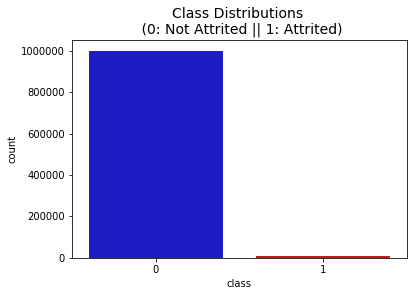

In [192]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('class', data=univ, palette=colors)
plt.title('Class Distributions \n (0: Not Attrited || 1: Attrited)', fontsize=14)

In [193]:
# random undersampling

In [18]:
univ = univ.sample(frac=1)

In [19]:
univ['attrited'].value_counts()

0    1000000
1       6950
Name: attrited, dtype: int64

In [20]:
# amount of fraud classes 492 rows.
attr_df = univ.loc[univ['attrited'] == 1]
non_attr_df = univ.loc[univ['attrited'] == 0][:6950]

In [21]:
normal_distributed_df = pd.concat([attr_df, non_attr_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,OCIF_id,attrited,act043,mob002,mob024,mob027,mob043,mob053,mob070,mob080,...,trn064,act097,trn078,trn024,sr058,sr128,sr358,sr214,sr011,sr471
1005600,924238440896500,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
250412,219183514225600,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
981810,920279533290600,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
712415,624221183769300,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267040,222052537627900,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Correlation Matrices

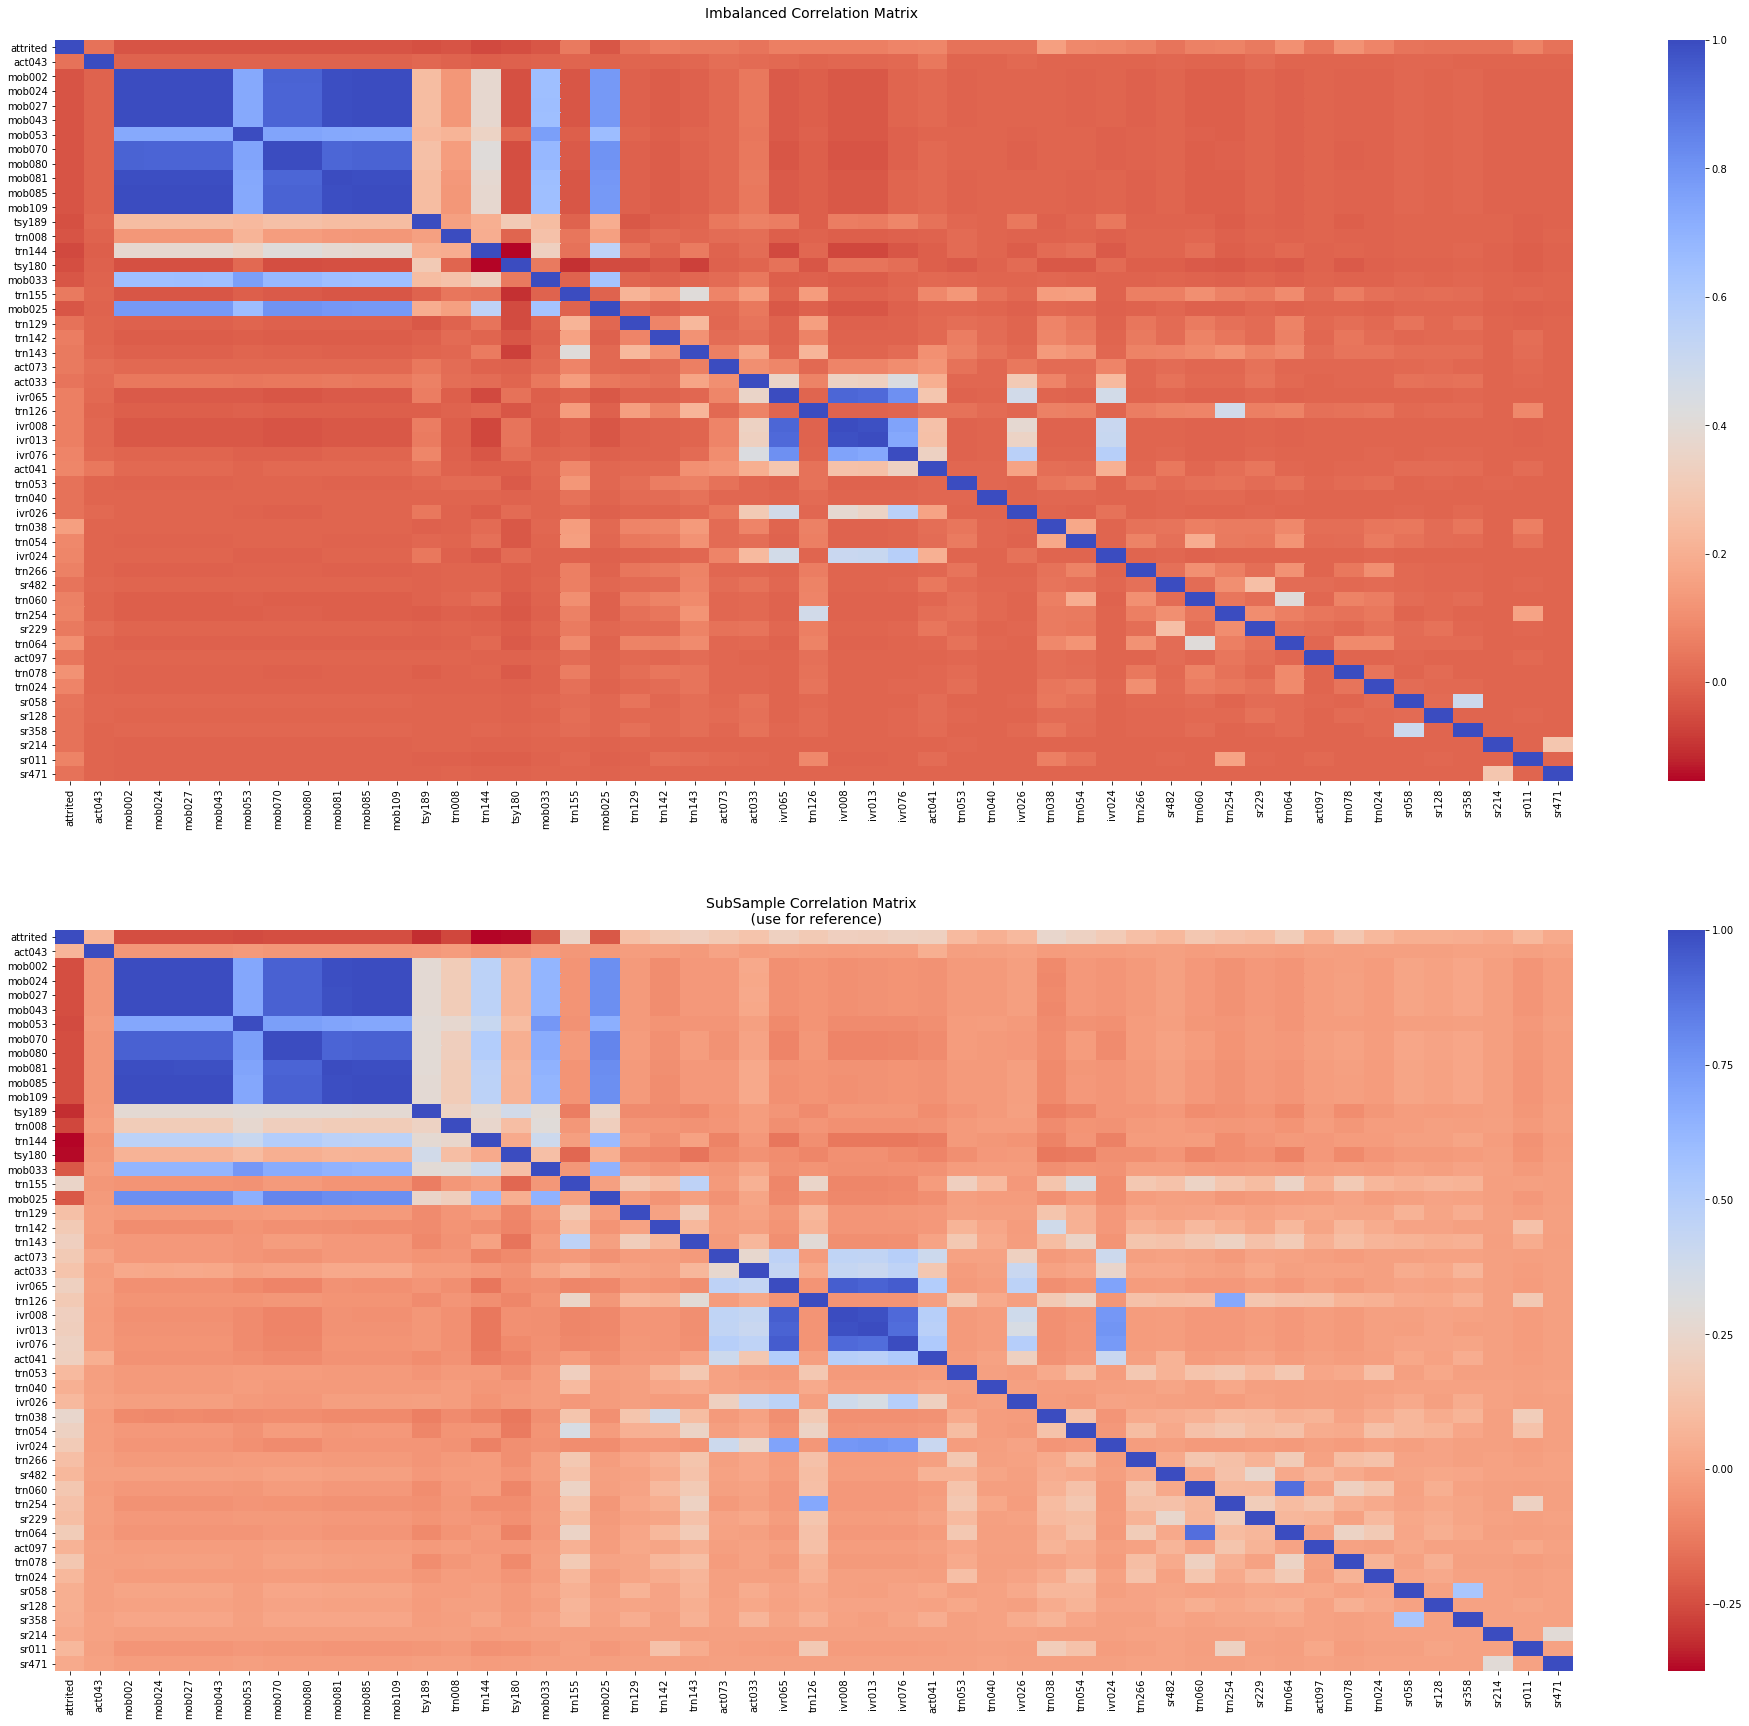

In [25]:

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(34,30))

# Entire DataFrame
corr = univ.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n ", fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [26]:
new_df.shape

(13900, 52)

In [27]:
# train_test split:
#training_data, testing_data = train_test_split(new_df, test_size=0.2, random_state = 22)

In [28]:
y=new_df['attrited']

In [35]:
X=new_df.loc[:, (new_df.columns != 'attrited') & (new_df.columns != 'OCIF_id') & (new_df.columns != 'idx')]

In [36]:
X.head()

,act043,mob002,mob024,mob027,mob043,mob053,mob070,mob080,mob081,mob085,...,trn064,act097,trn078,trn024,sr058,sr128,sr358,sr214,sr011,sr471
1005600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
250412,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
981810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
712415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [38]:
#simple logistic regression

In [39]:
X_test.shape

(4170, 50)

In [40]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regresbsion classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regresbsion classifier on test set: 0.81


In [42]:
y_test.value_counts()

1    2086
0    2084
Name: attrited, dtype: int64

In [43]:
print(confusion_matrix(y_test, y_pred))

[[1667  417]
 [ 359 1727]]


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2084
           1       0.81      0.83      0.82      2086

    accuracy                           0.81      4170
   macro avg       0.81      0.81      0.81      4170
weighted avg       0.81      0.81      0.81      4170



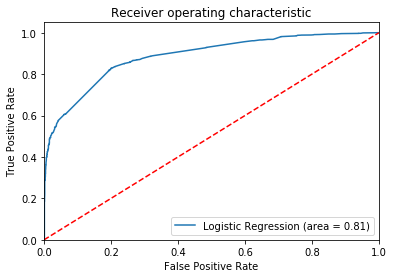

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [46]:
#plot classification report
def plot_classification_report(classificationReport,
                               title='Classification report',
                               cmap='RdBu'):

    classificationReport = classificationReport.replace('\n\n', '\n')
    classificationReport = classificationReport.replace(' / ', '/')
    lines = classificationReport.split('\n')

    classes, plotMat, support, class_names = [], [], [], []
    for line in lines[1:]:  # if you don't want avg/total result, then change [1:] into [1:-1]
        t = line.strip().split()
        if len(t) < 2:
            continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)

    plotMat = np.array(plotMat)
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup)
                   for idx, sup in enumerate(support)]

    plt.imshow(plotMat, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    plt.xticks(np.arange(3), xticklabels, rotation=45)
    plt.yticks(np.arange(len(classes)), yticklabels)

    upper_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 8
    lower_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 2
    for i, j in itertools.product(range(plotMat.shape[0]), range(plotMat.shape[1])):
        plt.text(j, i, format(plotMat[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if (plotMat[i, j] > upper_thresh or plotMat[i, j] < lower_thresh) else "black",fontsize=12,fontweight='bold')

    plt.ylabel('Metrics')
    plt.xlabel('Classes')
    plt.tight_layout()

In [47]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.80      0.81      2084\n           1       0.81      0.83      0.82      2086\n\n    accuracy                           0.81      4170\n   macro avg       0.81      0.81      0.81      4170\nweighted avg       0.81      0.81      0.81      4170\n'

In [48]:
len(classification_report(y_test, y_pred))

326

In [49]:
sampleClassificationReport = classification_report(y_test, y_pred)[0:166]

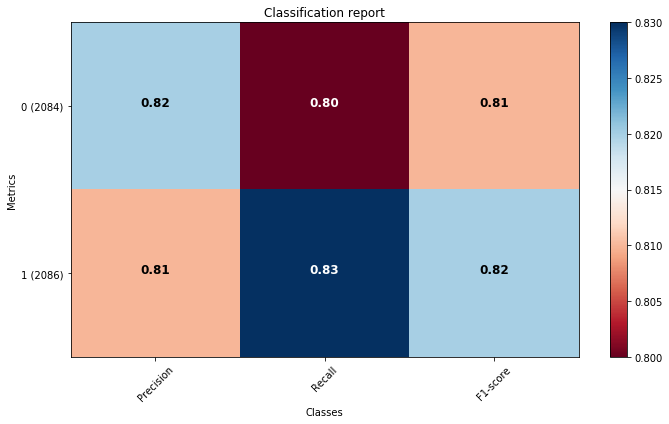

In [50]:
plt.figure(figsize=(10,6))
plot_classification_report(sampleClassificationReport)
plt.show()

## remove vars that are highly correlated from base dataframe based on profile report

In [15]:
univ.shape

(1006950, 52)

In [16]:
import gc
gc.collect()

20908

In [89]:
univ1=univ.drop(['ivr008','mob024','mob027','mob043','mob070','mob080','mob085'], axis = 1) 

In [90]:
univ1.head()

,OCIF_id,attrited,act043,mob002,mob053,mob081,mob109,tsy189,trn008,trn144,...,trn064,act097,trn078,trn024,sr058,sr128,sr358,sr214,sr011,sr471
0,001069464216288,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,001069464307179,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,001069464309050,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,001069466113872,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,001069467716456,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## smote oversampling 

In [47]:
os = SMOTE(random_state=9)

In [48]:
smoteY=univ1['attrited']

In [49]:
smoteX=univ1.loc[:, (univ1.columns != 'attrited') & (univ1.columns != 'OCIF_id') ]

In [50]:
sX_train, sX_test, sy_train, sy_test = train_test_split(smoteX, smoteY, test_size=0.3, random_state=8)

In [51]:
os_data_X,os_data_y=os.fit_sample(sX_train, sy_train)


In [52]:
sX_test.shape

(302085, 43)

In [53]:
sX_train.shape

(704865, 43)

In [54]:
columns = sX_train.columns

In [55]:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

In [56]:
os_data_y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [57]:
os_data_y['y'].value_counts()

1    700011
0    700011
Name: y, dtype: int64

In [26]:
## we now have balanced training dataset. we can do Recursive Feature Elimination (RFE)


In [27]:
#from sklearn.feature_selection import RFE

In [28]:
#logreg = LogisticRegression()

In [29]:
#rfe = RFE(logreg, 30)

In [30]:
#rfe1 = rfe.fit(os_data_X,os_data_y)

In [31]:
#print(rfe1.ranking_)

In [32]:
#rfe.support_

In [33]:
#fncol=os_data_X.columns[rfe.support_]

In [70]:
#find the most significant 30 columns. and drop the other 14. 

#os_data_X1 = pd.DataFrame(data=os_data_X,columns=fncol )

In [71]:
#os_data_X1.shape

In [72]:
# p values are all significant. we are good to go. 

# Implement simple classifiers

In [74]:


classifiers = {
    "LogisiticRegression": LogisticRegression(random_state=10),
     "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=10),
    #"GradientBoostingClassifier":GradientBoostingClassifier(random_state=3457),
    #"Support Vector Classifier": SVC(random_state=10),
    "XGBoostClassifier": XGBClassifier(random_state=3457)
}

In [45]:
logreg=LogisticRegression(random_state=10).fit(os_data_X, os_data_y)


C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
print("LogisticRegression as a testing score of " ,logreg.score(sX_test, sy_test))

LogisticRegression as a testing score of  0.7888706820927884


In [79]:
logregpred=logreg.predict(sX_test)

In [48]:
filename = 'logregModel_bin.sav'
pickle.dump(logreg, open(filename, 'wb'))

In [49]:
logregpred=pickle.load(open('logregModel_bin.sav', 'rb')).predict(sX_test)

In [50]:
dtreereg=DecisionTreeClassifier(random_state=10).fit(os_data_X, os_data_y)


In [51]:
print("DecisionTreeClassifier as a testing score of " ,dtreereg.score(sX_test, sy_test))

DecisionTreeClassifier as a testing score of  0.8000496548984557


In [80]:
dtreepred=dtreereg.predict(sX_test)

In [53]:
filename = 'dtreeModel_bin.sav'
pickle.dump(dtreereg, open(filename, 'wb'))

In [54]:
xbgreg=XGBClassifier(random_state=3457).fit(os_data_X, os_data_y)

C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
print("XGBClassifier as a testing score of " ,xbgreg.score(sX_test, sy_test))


XGBClassifier as a testing score of  0.7769336445040304


In [81]:

xgbpred=xbgreg.predict(sX_test)

In [57]:
filename = 'XGBModel_bin.sav'
pickle.dump(xbgreg, open(filename, 'wb'))

In [58]:
gradbreg=GradientBoostingClassifier(random_state=10).fit(os_data_X, os_data_y)


C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
print("GradientBoostingClassifier testing score of " ,gradbreg.score(sX_test, sy_test))

GradientBoostingClassifier testing score of  0.777820812023106


In [82]:
gradbpred=gradbreg.predict(sX_test)

In [78]:
gradbpred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [61]:
filename = 'gradientbModel_bin.sav'
pickle.dump(gradbreg, open(filename, 'wb'))

In [122]:
#alg_lst=[] 

In [62]:
classification_report(sy_test, logregpred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.79      0.88    299989\n           1       0.03      0.84      0.05      2096\n\n    accuracy                           0.79    302085\n   macro avg       0.51      0.82      0.47    302085\nweighted avg       0.99      0.79      0.88    302085\n'

In [32]:
#plot classification report
def plot_classification_report_ax(classificationReport,pos,
                               title='Classification report',
                               cmap='RdBu'):

    classificationReport = classificationReport.replace('\n\n', '\n')
    classificationReport = classificationReport.replace(' / ', '/')
    lines = classificationReport.split('\n')

    classes, plotMat, support, class_names = [], [], [], []
    for line in lines[1:]:  # if you don't want avg/total result, then change [1:] into [1:-1]
        t = line.strip().split()
        if len(t) < 2:
            continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)

    plotMat = np.array(plotMat)
    
    pos.set_xticks(np.arange(3))
    pos.set_yticks(np.arange(len(classes)))
    pos.set_xticklabels(['Precision', 'Recall', 'F1-score'])
    pos.set_yticklabels(['{0} ({1})'.format(class_names[idx], sup)
                   for idx, sup in enumerate(support)])

    
    pos.imshow(plotMat, interpolation='nearest', cmap=cmap, aspect='auto')
    pos.set_title(title,fontsize=20,fontweight='bold')
    #pos.colorbar()
    

    upper_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 8
    lower_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 2
    for i, j in itertools.product(range(plotMat.shape[0]), range(plotMat.shape[1])):
        pos.text(j, i, format(plotMat[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if (plotMat[i, j] > upper_thresh or plotMat[i, j] < lower_thresh) else "black",fontsize=25,fontweight='bold')

    pos.set_ylabel('Metrics')
    pos.set_xlabel('Classes')
    #pos.set_tight_layout()

In [30]:
logregpred=pickle.load(open('logregModel_bin.sav', 'rb')).predict(sX_test)
dtreepred=pickle.load(open('dtreeModel_bin.sav', 'rb')).predict(sX_test)
xgbpred=pickle.load(open('XGBModel_bin.sav', 'rb')).predict(sX_test)
gradbpred=pickle.load(open('gradientbModel_bin.sav', 'rb')).predict(sX_test)

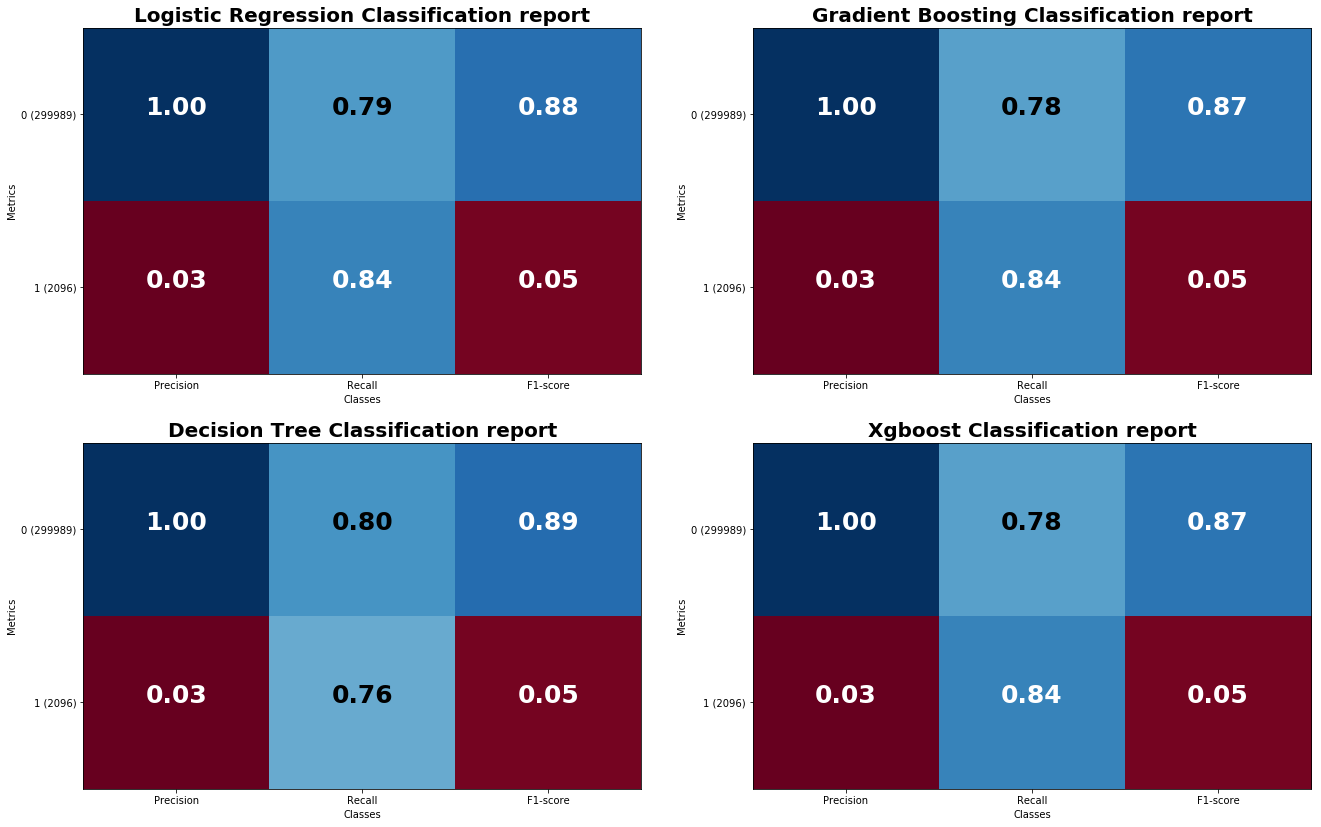

In [62]:
fig, ax = plt.subplots(2, 2,figsize=(22,14))

plot_classification_report_ax(classification_report(sy_test, logregpred)[:166],title='Logistic Regression Classification report',pos=ax[0][0])
plot_classification_report_ax(classification_report(sy_test, gradbpred)[:166],title='Gradient Boosting Classification report',pos=ax[0][1])
plot_classification_report_ax(classification_report(sy_test, dtreepred)[:166],title='Decision Tree Classification report',pos=ax[1][0])
plot_classification_report_ax(classification_report(sy_test, xgbpred)[:166],title='Xgboost Classification report',pos=ax[1][1])
plt.savefig('classification_report_bin.png')
plt.show()


In [65]:
confusion_matrix(sy_test, logregpred)

array([[236537,  63452],
       [   327,   1769]], dtype=int64)

In [66]:
'''
for key, classifier in classifiers.items():
    clafit=classifier.fit(os_data_X, os_data_y)
    alg_lst.append(clafit)
    testing_score = clafit.score( sX_test, sy_test)
    
    print("Classifiers: ", classifier.__class__.__name__, "Has a testing score of {:.2f}".format(testing_score))
 '''   

'\nfor key, classifier in classifiers.items():\n    clafit=classifier.fit(os_data_X, os_data_y)\n    alg_lst.append(clafit)\n    testing_score = clafit.score( sX_test, sy_test)\n    \n    print("Classifiers: ", classifier.__class__.__name__, "Has a testing score of {:.2f}".format(testing_score))\n '

In [67]:
#predictions:
'''
logregpred=alg_lst[0].predict(sX_test)
knpred=alg_lst[1].predict(sX_test)
dtreepred=alg_lst[2].predict(sX_test)
xgbpred=alg_lst[3].predict(sX_test)
'''

'\nlogregpred=alg_lst[0].predict(sX_test)\nknpred=alg_lst[1].predict(sX_test)\ndtreepred=alg_lst[2].predict(sX_test)\nxgbpred=alg_lst[3].predict(sX_test)\n'

In [63]:
logregpred=pickle.load(open('logregModel_bin.sav', 'rb')).predict_proba(sX_test)[:,1]



In [64]:
logregpred

array([0.61585288, 0.00157231, 0.49457837, ..., 0.01601569, 0.2416697 ,
       0.24011584])

In [65]:
dtreepred=pickle.load(open('dtreeModel_bin.sav', 'rb')).predict_proba(sX_test)[:,1]
xgbpred=pickle.load(open('XGBModel_bin.sav', 'rb')).predict_proba(sX_test)[:,1]
gradbpred=pickle.load(open('gradientbModel_bin.sav', 'rb')).predict_proba(sX_test)[:,1]

In [66]:
log_fpr, log_tpr, log_thresold = roc_curve(sy_test, logregpred)

In [67]:
log_fpr, log_tpr, log_thresold = roc_curve(sy_test, logregpred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(sy_test, dtreepred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(sy_test, xgbpred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(sy_test, gradbpred)


In [170]:
log_fpr

array([0.00000000e+00, 0.00000000e+00, 3.33345556e-06, ...,
       9.99479981e-01, 9.99993333e-01, 1.00000000e+00])

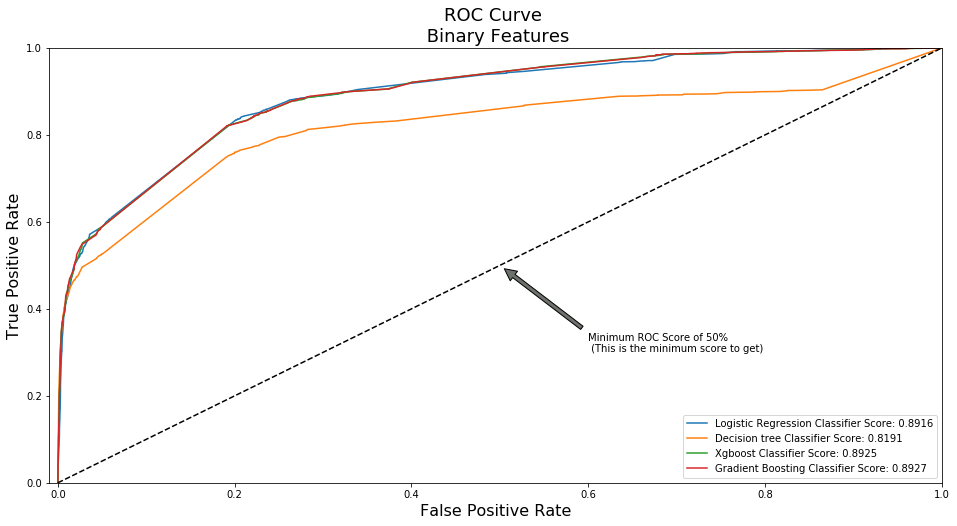

In [69]:


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Binary Features', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(sy_test, logregpred)))
    plt.plot(knear_fpr, knear_tpr, label='Decision tree Classifier Score: {:.4f}'.format(roc_auc_score(sy_test, dtreepred)))
    plt.plot(svc_fpr, svc_tpr, label='Xgboost Classifier Score: {:.4f}'.format(roc_auc_score(sy_test, xgbpred)))
    plt.plot(tree_fpr, tree_tpr, label='Gradient Boosting Classifier Score: {:.4f}'.format(roc_auc_score(sy_test, gradbpred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.savefig('roc1.png')
plt.show()

## Auto Encoder Model

The point of using autoencoders is to use the input data as its own label, and come up with some useful intermediate representation (encoding). Then when running a prediction, and feeding in input data that does not fit well to the intermediate representation, then output signal that it does not fit well. This is known as **Reconstruction Error**.

For this reason we drop the fraudulant data from the training, in order to come up with an encoding for "normal" (non-fraudulant) transactions. After the model is trained, the hope is that feeding in fraudulant data will easily be flagged.

In [95]:
import gc
gc.collect()

51326

In [91]:
univ2=univ1.drop(['OCIF_id'],axis = 1)

In [92]:
univ2.shape

(1006950, 44)

In [93]:
# split the data 70/30, training to testing
train_x, test_x = train_test_split(univ2, test_size=0.25, random_state=10)


In [94]:
train_x.shape

(755212, 44)

In [95]:
test_x.shape

(251738, 44)

In [96]:
train_x.columns

Index(['attrited', 'act043', 'mob002', 'mob053', 'mob081', 'mob109', 'tsy189',
       'trn008', 'trn144', 'tsy180', 'mob033', 'trn155', 'mob025', 'trn129',
       'trn142', 'trn143', 'act073', 'act033', 'ivr065', 'trn126', 'ivr013',
       'ivr076', 'act041', 'trn053', 'trn040', 'ivr026', 'trn038', 'trn054',
       'ivr024', 'trn266', 'sr482', 'trn060', 'trn254', 'sr229', 'trn064',
       'act097', 'trn078', 'trn024', 'sr058', 'sr128', 'sr358', 'sr214',
       'sr011', 'sr471'],
      dtype='object')

In [97]:

# take out the attrited transactions from training data
attri_df = train_x[train_x['attrited'] == 1]
# keep only normala transaction data in training set
train_x = train_x[train_x['attrited'] == 0]

train_y=train_x['attrited']
# drop the class column (labels) from training set
train_x = train_x.drop(['attrited'], axis=1)

# create labels for test data
test_y = test_x['attrited']
# drop the labels from test data itself
test_x = test_x.drop(['attrited'], axis=1)


In [98]:
train_y.shape

(750019,)

In [99]:

# transform to ndarray
train_x = train_x.values
test_x = test_x.values

In [100]:
# take out labels from remaining fraud data (taken out from training set)
attri_y = attri_df['attrited']
attri_x = attri_df.drop(['attrited'], axis=1).values

# extend test data and label with additional attri. data
test_x_extended = np.concatenate((attri_x, test_x), axis=0)
test_y_extended = pd.concat([attri_y, test_y])

In [140]:
# model train
nb_epoch = 30
batch_size = 256
input_dim = train_x.shape[1] #num of columns, 30
encoding_dim = 25
hidden_dim = int(encoding_dim / 2) #i.e. 7
learning_rate = 1e-7

In [107]:
attri_df.head()

,attrited,act043,mob002,mob053,mob081,mob109,tsy189,trn008,trn144,tsy180,...,trn064,act097,trn078,trn024,sr058,sr128,sr358,sr214,sr011,sr471
389957,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
704699,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
404318,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
864474,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
522984,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:


input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

Instructions for updating:
Colocations handled automatically by placer.


In [109]:
np.unique(train_y, return_counts=True)

(array([0], dtype=int64), array([750019], dtype=int64))

In [110]:
np.unique(test_y, return_counts=True)

(array([0, 1], dtype=int64), array([249981,   1757], dtype=int64))

In [101]:
train_x.shape

(750019, 43)

In [102]:
test_x.shape

(251738, 43)

In [103]:
#use standard scalar to fit transform data

scaler = StandardScaler()
scaled_trainx=scaler.fit_transform(train_x)

In [104]:
scaled_testx=scaler.fit_transform(test_x)

In [141]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="autoencoder_attr_bin.h5",
                               save_best_only=True,
                               verbose=0)

history = autoencoder.fit(scaled_trainx, scaled_trainx,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(scaled_testx, scaled_testx),
                    verbose=1,
                    callbacks=[cp]).history

Train on 750019 samples, validate on 251738 samples
Epoch 1/30
750019/750019 [==============================] - 14s 18us/sample - loss: 0.4078 - acc: 0.8282 - val_loss: 0.4094 - val_acc: 0.8275
Epoch 2/30
750019/750019 [==============================] - 12s 17us/sample - loss: 0.4077 - acc: 0.8282 - val_loss: 0.4097 - val_acc: 0.8297
Epoch 3/30
750019/750019 [==============================] - 14s 18us/sample - loss: 0.4077 - acc: 0.8285 - val_loss: 0.4099 - val_acc: 0.8309
Epoch 4/30
750019/750019 [==============================] - 11s 15us/sample - loss: 0.4077 - acc: 0.8291 - val_loss: 0.4097 - val_acc: 0.8291
Epoch 5/30
750019/750019 [==============================] - 10s 14us/sample - loss: 0.4076 - acc: 0.8299 - val_loss: 0.4098 - val_acc: 0.8302
Epoch 6/30
750019/750019 [==============================] - 12s 17us/sample - loss: 0.4077 - acc: 0.8298 - val_loss: 0.4096 - val_acc: 0.8310
Epoch 7/30
750019/750019 [==============================] - 10s 14us/sample - loss: 0.4075 - acc

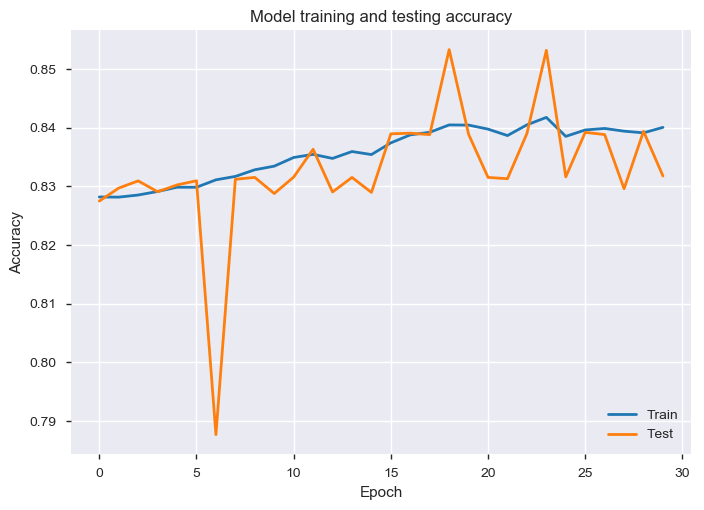

In [142]:
plt.plot(history['acc'], linewidth=2, label='Train')
plt.plot(history['val_acc'], linewidth=2, label='Test')
plt.legend(loc='lower right')
plt.title('Model training and testing accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [84]:
autoencoder = load_model('autoencoder_attr_bin.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


In [105]:
scaled_testx_ext=scaler.fit_transform(test_x_extended)

In [106]:
preds = autoencoder.predict(scaled_testx_ext)

In [107]:

mse = np.mean(np.power(test_x_extended - preds, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'Actual': test_y_extended})
error_df.describe()

,Actual,Reconstruction_error
count,256931.00000,256931.000000
mean,0.02705,0.470167
std,0.16223,1.984442
min,0.00000,0.000000
25%,0.00000,0.002248
50%,0.00000,0.011899
75%,0.00000,0.095044
max,1.00000,47.699534


In [108]:
#add stats for the reconstr. erro

(array([2.500e+05, 4.102e+03, 1.984e+03, 3.020e+02, 1.210e+02, 2.500e+02,
        7.800e+01, 7.500e+01, 1.200e+01, 7.000e+00]),
 array([ 0.        ,  4.7699534 ,  9.5399068 , 14.3098602 , 19.0798136 ,
        23.849767  , 28.6197204 , 33.3896738 , 38.15962719, 42.92958059,
        47.69953399]),
 <a list of 10 Patch objects>)

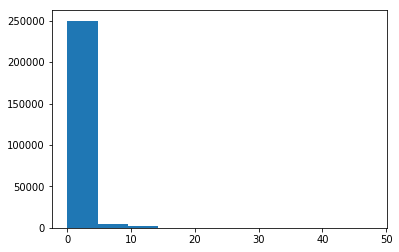

In [109]:
plt.hist(error_df['Reconstruction_error'])

In [149]:
num_attr = error_df.Actual[error_df.Actual == 1].count()
num_normal = error_df.Actual[error_df.Actual == 0].count()
no_skill_level = num_attr/(num_attr + num_normal)

num_attr, num_normal, no_skill_level

(6950, 249981, 0.027050064024971687)

In [150]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.Actual, error_df.Reconstruction_error)

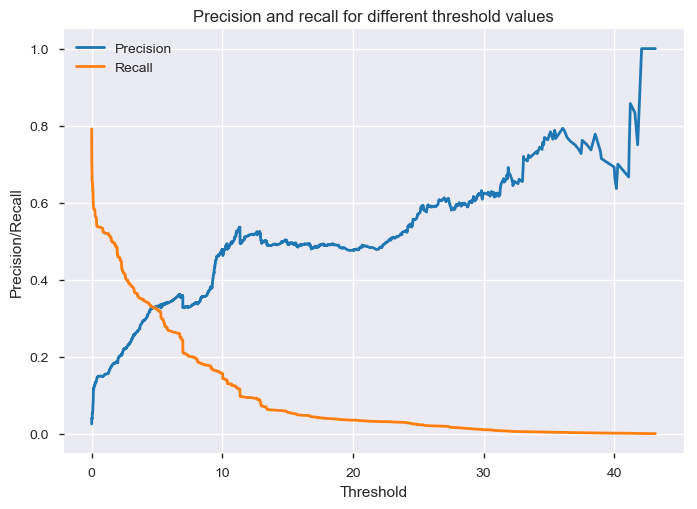

In [151]:
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=2)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=2)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [110]:
threshold_fixed=0

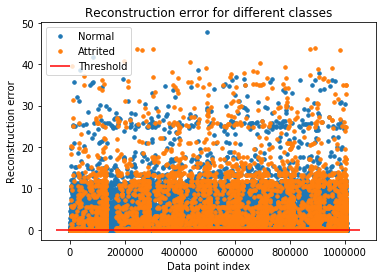

In [111]:

groups = error_df.groupby('Actual')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Attrited" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [112]:
preds_y_binary = [1 if e > 0 else 0 for e in error_df.Reconstruction_error]

print(classification_report(test_y_extended, preds_y_binary))

              precision    recall  f1-score   support

           0       0.96      0.14      0.24    249981
           1       0.02      0.79      0.05      6950

    accuracy                           0.16    256931
   macro avg       0.49      0.46      0.15    256931
weighted avg       0.93      0.16      0.24    256931



In [113]:
conf_matrix = confusion_matrix(error_df.Actual, preds_y_binary)
conf_matrix

array([[ 34616, 215365],
       [  1449,   5501]], dtype=int64)

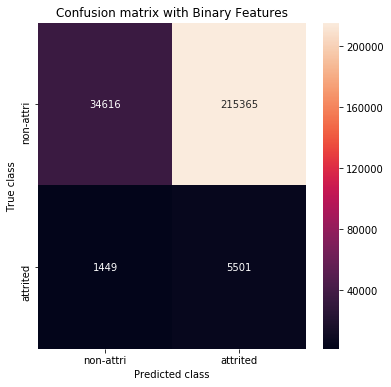

In [115]:
LABELS = ["non-attri","attrited"]
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix with Binary Features")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## create profile report


In [13]:
pandasreport=pandprof.ProfileReport(univ)

In [14]:
pandasreport.to_file("OneHot_fn_EDA.html")